In [128]:
import requests
from bs4 import BeautifulSoup as bs
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공공데이터 포털 REST API 

In [6]:
base_url="http://apis.data.go.kr/B500001/drghtIdexSpiAnals"  #End point

url = base_url + "/analsInfoList"

In [13]:
url="http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList?hjdCd=1168058000&stDt=20190501&edDt=20190531&numOfRows=10&pageNo=1&serviceKey=UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD%2FOycfbIQ%3D%3D"

In [41]:
parsed_url=urllib.parse.urlparse(url)
parsed_url

ParseResult(scheme='http', netloc='apis.data.go.kr', path='/B500001/drghtIdexSpiAnals/analsInfoList', params='', query='hjdCd=1168058000&stDt=20190501&edDt=20190531&numOfRows=10&pageNo=1&serviceKey=UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD%2FOycfbIQ%3D%3D', fragment='')

In [33]:
base_url="http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList"

In [29]:
#특수문자들의 경우(% 같은 것) 리퀘스트 객체가 인코딩을 해버리기 때문에 url이 달라질수 있음. 
#unquote 를 이용해 특수문자들을 미리 풀어버려서 리퀘스트 객체에서 인코딩 하는 것을 방지함

urllib.parse.unquote("UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD%2FOycfbIQ%3D%3D")

'UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD/OycfbIQ=='

In [31]:
params={
    'hjdCd':'1168058000',
    'stDt':'20190501',
    'edDt':'20190531',
    'numOfRow':10,
    'pageNo':1,
    'serviceKey':"UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD/OycfbIQ=="
    
}

In [37]:
resp=requests.get(base_url,params=params)
resp

<Response [200]>

In [39]:
resp.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.26</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.2</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst>정상</anlrst><anlval>-0.55</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrs

In [46]:
soup=bs(resp.text)

In [47]:
header=soup.find("header")
body=soup.find("body")

In [51]:
result_code=header.find("resultcode").text
result_msg=header.find("resultmsg").text
result_code,result_msg

('00', 'NORMAL SERVICE.')

In [54]:
num_of_rows=body.find("numofrows").text
page_no=body.find('pageno').text
total_count=body.find("totalcount").text
num_of_rows,page_no,total_count

('10', '1', '62')

In [60]:
items=body.find_all("item")

result_list=[]
for item in items:
    result_list.append({
        'anldt':item.find('anldt').text,
        'anlrst':item.find("anlrst").text,
        'anlval':item.find("anlval").text,
        'dv':item.find("dv").text,
        "hjdcd":item.find("hjdcd").text
    })
    
result_list

[{'anldt': '20190501',
  'anlrst': '정상',
  'anlval': '-0.18',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190501',
  'anlrst': '정상',
  'anlval': '-0.21',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': '-0.21',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': '-0.18',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': '-0.26',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': '-0.55',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': '-0.57',
  'dv

## json

In [66]:
import datetime
now=datetime.datetime.now()
today=now.strftime("%Y%m%d")
today

'20200806'

In [139]:
base_url="http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList"

params={
    'hjdCd':'1168058000',
    'stDt':'20100101',
    'edDt':today,
    'numOfRows':100000,
    'serviceKey':"UHHt68nbqYu3v3I2cmp8IGERovTVj5dHQnsWPEXMiJ1uczBvcPUNVUt1hRZSmdku95JXpR8MJxAoVD/OycfbIQ==",
    "_type":'json'
}
# _type : json - json 형식으로 출력

resp=requests.get(base_url,params)
resp.text

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"items":{"item":[{"anldt":20130101,"anlrst":"보통습윤","anlval":1.23,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130101,"anlrst":"보통습윤","anlval":1.38,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130102,"anlrst":"보통습윤","anlval":1.4,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130102,"anlrst":"보통습윤","anlval":1.08,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130103,"anlrst":"정상","anlval":0.73,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130103,"anlrst":"보통습윤","anlval":1.44,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130104,"anlrst":"보통습윤","anlval":1.42,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130104,"anlrst":"정상","anlval":0.76,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130105,"anlrst":"정상","anlval":0.8,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130105,"anlrst":"보통습윤","anlval":1.44,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130106,"anlrst":"정상","anlval":0.84,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130106,"anlrst":"보통습윤

In [140]:
data=resp.json()
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.23,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.38,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.4,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.08,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '정상',
      'anlval': 0.73,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '보통습윤',
      'anlval': 1.44,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '보통습윤',
      'anlval': 1.42,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '정상',
      'anlval': 0.76

In [141]:
data.keys()

dict_keys(['response'])

In [142]:
items=data['response']['body']['items']['item']

In [143]:
dright_idx=pd.DataFrame(items)
dright_idx

,anldt,anlrst,anlval,dv,hjdcd
0,20130101,보통습윤,1.23,SPI6,1168058000
1,20130101,보통습윤,1.38,SPI3,1168058000
2,20130102,보통습윤,1.4,SPI3,1168058000
3,20130102,보통습윤,1.08,SPI6,1168058000
4,20130103,정상,0.73,SPI6,1168058000
...,...,...,...,...,...
5527,20200729,정상,-.9,SPI3,1168058000
5528,20200730,보통가뭄,-1.04,SPI6,1168058000
5529,20200730,정상,-.9,SPI3,1168058000
5530,20200731,정상,-.9,SPI3,1168058000


In [144]:
dright_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532 entries, 0 to 5531
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anldt   5532 non-null   int64 
 1   anlrst  5532 non-null   object
 2   anlval  5532 non-null   object
 3   dv      5532 non-null   object
 4   hjdcd   5532 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 216.2+ KB


In [145]:
dright_idx['anlval']=dright_idx['anlval'].astype('float')

In [146]:
dright_idx.describe()

,anldt,anlval,hjdcd
count,5.532000e+03,5532.000000,5.532000e+03
mean,2.016369e+07,-0.375503,1.168058e+09
std,2.193091e+04,0.962949,0.000000e+00
min,2.013010e+07,-2.500000,1.168058e+09
25%,2.014112e+07,-1.200000,1.168058e+09
50%,2.016101e+07,-0.375000,1.168058e+09
75%,2.018091e+07,0.280000,1.168058e+09
max,2.020073e+07,2.400000,1.168058e+09


In [147]:
dright_idx['anlrst'].value_counts()

정상      3294
보통가뭄     978
심한가뭄     581
보통습윤     355
심한습윤     158
극한가뭄     156
극한습윤      10
Name: anlrst, dtype: int64

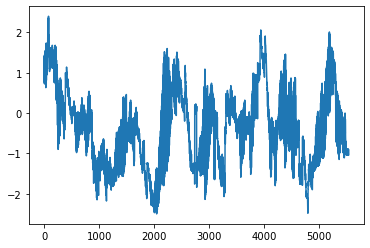

In [148]:
plt.plot(dright_idx['anlval'])

([<matplotlib.patches.Wedge at 0x1d59646bdc0>,
 [Text(-0.3249128099383104, 1.0509194383671812, '정상'),
  Text(-0.44421231620991897, -1.0063177520681126, '보통가뭄'),
  Text(0.49783036730809477, -0.9809000588163341, '심한가뭄'),
  Text(0.9263294338048212, -0.5932232126837583, '보통습윤'),
  Text(1.0576857826361281, -0.3021601979238848, '심한습윤'),
  Text(1.0945101228665655, -0.10976151849631019, '극한가뭄'),
  Text(1.0999822617667607, -0.006246903111278847, '극한습윤')],
 [Text(-0.17722516905726018, 0.5732287845639169, '59.54'),
  Text(-0.24229762702359214, -0.5489005920371522, '17.68'),
  Text(0.2715438367135062, -0.5350363957180003, '10.50'),
  Text(0.5052706002571752, -0.32357629782750447, '6.42'),
  Text(0.5769195178015244, -0.16481465341302806, '2.86'),
  Text(0.5970055215635811, -0.05986991917980555, '2.82'),
  Text(0.5999903246000512, -0.0034074016970611887, '0.18')])

C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\Study1\lib\site-packages\matplotlib\backends\backend_agg.py

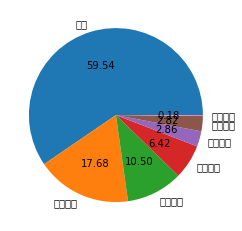

In [149]:
plt.pie(dright_idx['anlrst'].value_counts(),labels=dright_idx['anlrst'].value_counts().index,autopct="%.2f")

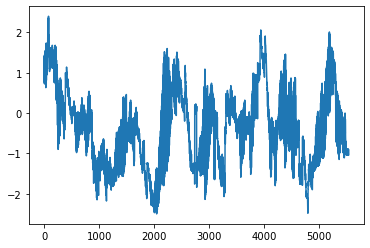

In [138]:
dright_idx['anlval'].plot()



# 네이버 POST 요청(데이터랩)

In [22]:
url = "https://openapi.naver.com/v1/datalab/search"

headers = {
"X-Naver-Client-Id":"3od03PNF3Yw7Mme6ZnaH",
"X-Naver-Client-Secret":"E56vro5EVi",
"Content-Type":"application/json"
}


params={
    "startDate" : "2019-08-03",
    "endDate" : "2020-08-03",
    "timeUnit":"date",
    "keywordGroups":[
        {
        "groupName":"코로나",
        "keywords":["코로나 현황","코로나","코로나 확산"]           
        },
        {
            "groupName":"마스크",
            "keywords":["마스크","공적 마스크","kf80","kf94"]
        }
    ]
    
}

In [23]:
import json

In [24]:
data=json.dumps(params)  #딕셔너리인 파이썬 객체를 json 객체로 바꿈
data

'{"startDate": "2019-08-03", "endDate": "2020-08-03", "timeUnit": "date", "keywordGroups": [{"groupName": "\\ucf54\\ub85c\\ub098", "keywords": ["\\ucf54\\ub85c\\ub098 \\ud604\\ud669", "\\ucf54\\ub85c\\ub098", "\\ucf54\\ub85c\\ub098 \\ud655\\uc0b0"]}, {"groupName": "\\ub9c8\\uc2a4\\ud06c", "keywords": ["\\ub9c8\\uc2a4\\ud06c", "\\uacf5\\uc801 \\ub9c8\\uc2a4\\ud06c", "kf80", "kf94"]}]}'

In [25]:
resp=requests.post(url,headers=headers,data=data)  #data=리퀘스트 포스트의 바디
resp

<Response [200]>

In [27]:
print(resp.text)

{"startDate":"2019-08-03","endDate":"2020-08-03","timeUnit":"date","results":[{"title":"코로나","keywords":["코로나 현황","코로나","코로나 확산"],"data":[{"period":"2019-08-03","ratio":0.00491},{"period":"2019-08-04","ratio":0.00478},{"period":"2019-08-05","ratio":0.00555},{"period":"2019-08-06","ratio":0.00482},{"period":"2019-08-07","ratio":0.00493},{"period":"2019-08-08","ratio":0.00483},{"period":"2019-08-09","ratio":0.00482},{"period":"2019-08-10","ratio":0.00528},{"period":"2019-08-11","ratio":0.00481},{"period":"2019-08-12","ratio":0.00486},{"period":"2019-08-13","ratio":0.0053},{"period":"2019-08-14","ratio":0.00523},{"period":"2019-08-15","ratio":0.00557},{"period":"2019-08-16","ratio":0.00473},{"period":"2019-08-17","ratio":0.00502},{"period":"2019-08-18","ratio":0.00529},{"period":"2019-08-19","ratio":0.00494},{"period":"2019-08-20","ratio":0.00513},{"period":"2019-08-21","ratio":0.00458},{"period":"2019-08-22","ratio":0.00472},{"period":"2019-08-23","ratio":0.0044},{"period":"2019-08-24","

In [28]:
result=resp.json()
result

{'startDate': '2019-08-03',
 'endDate': '2020-08-03',
 'timeUnit': 'date',
 'results': [{'title': '코로나',
   'keywords': ['코로나 현황', '코로나', '코로나 확산'],
   'data': [{'period': '2019-08-03', 'ratio': 0.00491},
    {'period': '2019-08-04', 'ratio': 0.00478},
    {'period': '2019-08-05', 'ratio': 0.00555},
    {'period': '2019-08-06', 'ratio': 0.00482},
    {'period': '2019-08-07', 'ratio': 0.00493},
    {'period': '2019-08-08', 'ratio': 0.00483},
    {'period': '2019-08-09', 'ratio': 0.00482},
    {'period': '2019-08-10', 'ratio': 0.00528},
    {'period': '2019-08-11', 'ratio': 0.00481},
    {'period': '2019-08-12', 'ratio': 0.00486},
    {'period': '2019-08-13', 'ratio': 0.0053},
    {'period': '2019-08-14', 'ratio': 0.00523},
    {'period': '2019-08-15', 'ratio': 0.00557},
    {'period': '2019-08-16', 'ratio': 0.00473},
    {'period': '2019-08-17', 'ratio': 0.00502},
    {'period': '2019-08-18', 'ratio': 0.00529},
    {'period': '2019-08-19', 'ratio': 0.00494},
    {'period': '2019-08-20',

만약 data를 xml 만들어서 보내야 할 경우

dicttoxml 라이브러리 설치 및 import 하여 사용, (상세내용 문서 참조)

혹은 구글검색 (how to convert dict to xml in python)